# Linear Regression

Linear regression is a statistical method used to find a relationship between two variables by fitting a straight line to the data. It helps us predict or estimate the value of one variable based on the value of another variable

For example, let's say we want to predict a person's weight (dependent variable) based on their height (independent variable). We collect data on the heights and weights of several individuals. By using linear regression, we can find a line that best fits the data points. This line represents the relationship between height and weight.

Once we have the line, we can use it to predict the weight of a person based on their height. If a person is 170 cm tall, the linear regression model might estimate their weight to be 70 kg. The line helps us make these predictions by using the relationship observed in the data.

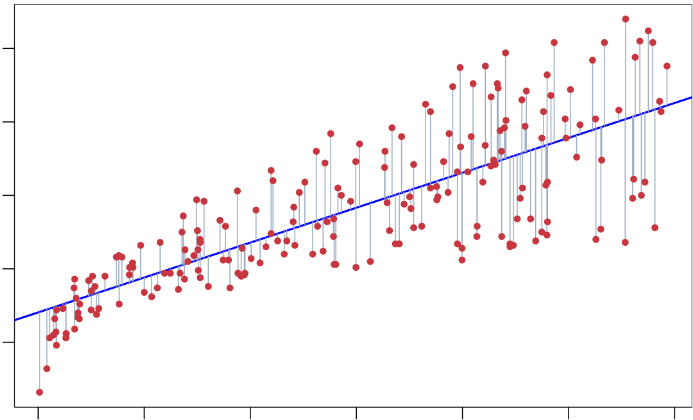



### Consider a Marketing dataset and Apply Linear Regression 

##### Content


#### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
mk = pd.read_csv('marketing.csv')
mk

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671


In [3]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [4]:
mk.describe()

,Salary,Children,Catalogs,AmountSpent
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000
std,30616.314826,1.05107,6.622895,961.068613
min,10100.000000,0.00000,6.000000,38.000000
25%,29975.000000,0.00000,6.000000,488.250000
50%,53700.000000,1.00000,12.000000,962.000000
75%,77025.000000,2.00000,18.000000,1688.500000
max,168800.000000,3.00000,24.000000,6217.000000


#### Data Cleaning and Analysis

In [5]:
mk.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='AmountSpent'>

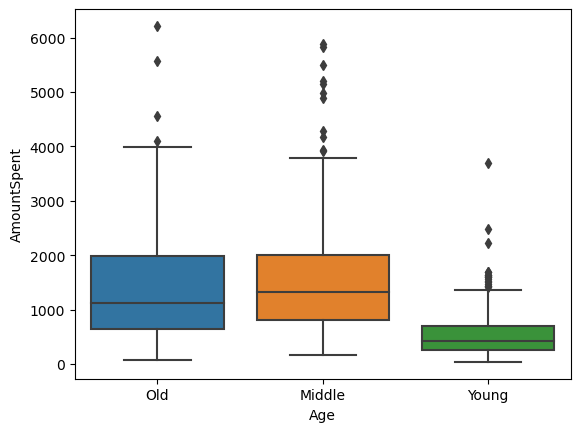

In [6]:
# make use of boxplot from seaborn library to understand the distribution of AmountSpent for each variables.
sns.boxplot(x=mk['Age'],y=mk['AmountSpent'])

In [7]:
# Combine Old & Middle aged into Mid-old. As they seems to share same distribution of AmoutSpent
mk.Age[mk.Age != 'Young'] = 'Mid-Old'

C:\Users\dheer\AppData\Local\Temp\ipykernel_3376\1105964562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk.Age[mk.Age != 'Young'] = 'Mid-Old'


<AxesSubplot:xlabel='Age', ylabel='AmountSpent'>

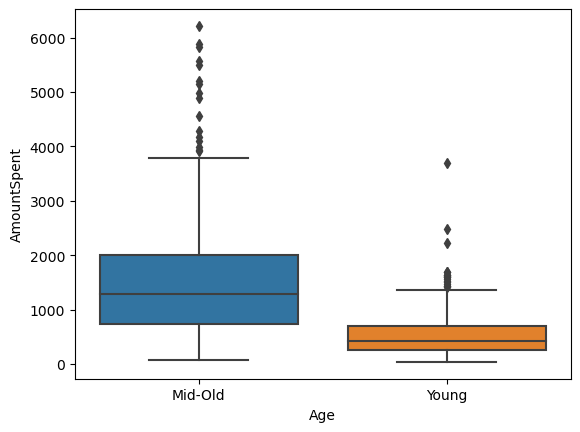

In [8]:
sns.boxplot(x=mk['Age'],y=mk['AmountSpent'])

<AxesSubplot:xlabel='Gender', ylabel='AmountSpent'>

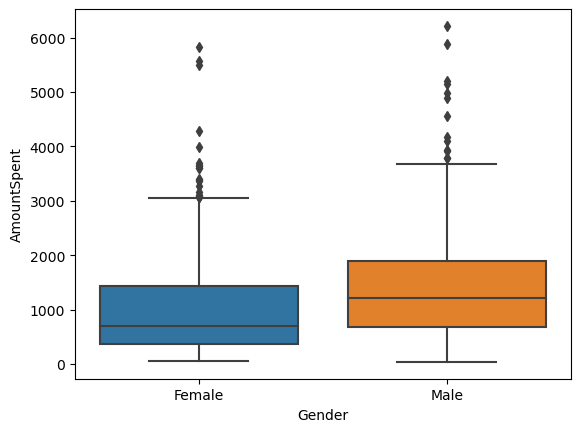

In [9]:
sns.boxplot(x=mk['Gender'],y=mk['AmountSpent'])

<AxesSubplot:xlabel='OwnHome', ylabel='AmountSpent'>

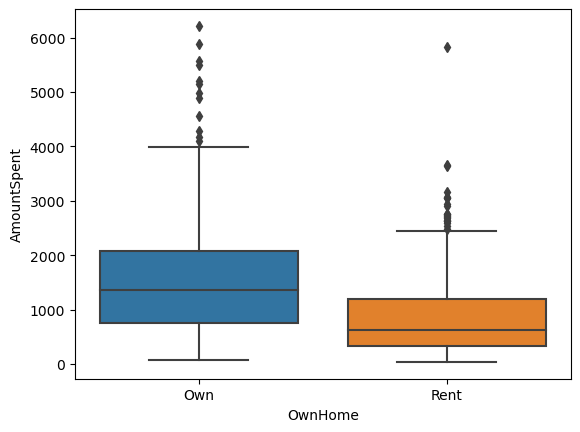

In [10]:
sns.boxplot(x=mk['OwnHome'],y=mk['AmountSpent'])

<AxesSubplot:xlabel='Married', ylabel='AmountSpent'>

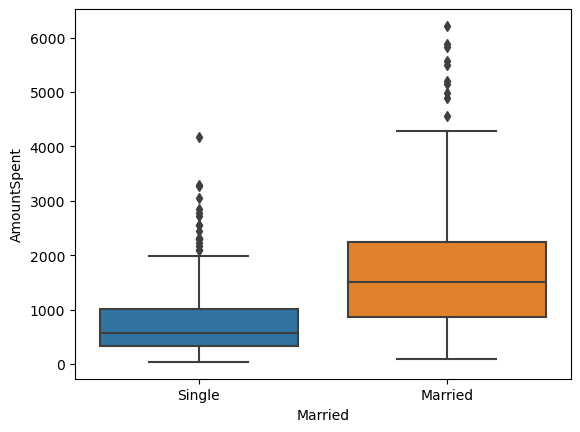

In [11]:
sns.boxplot(x=mk['Married'],y=mk['AmountSpent'])

<AxesSubplot:xlabel='Location', ylabel='AmountSpent'>

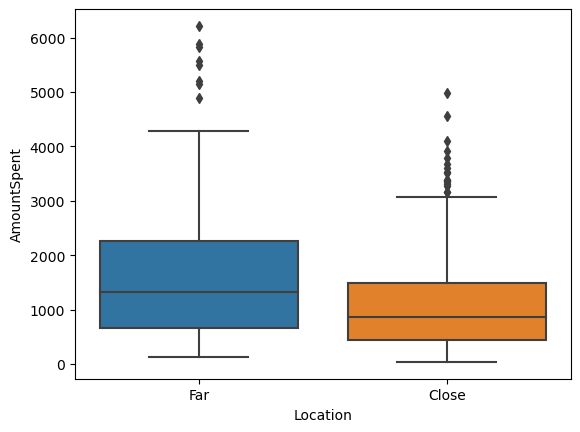

In [12]:
sns.boxplot(x=mk['Location'],y=mk['AmountSpent'])

<AxesSubplot:xlabel='Salary', ylabel='AmountSpent'>

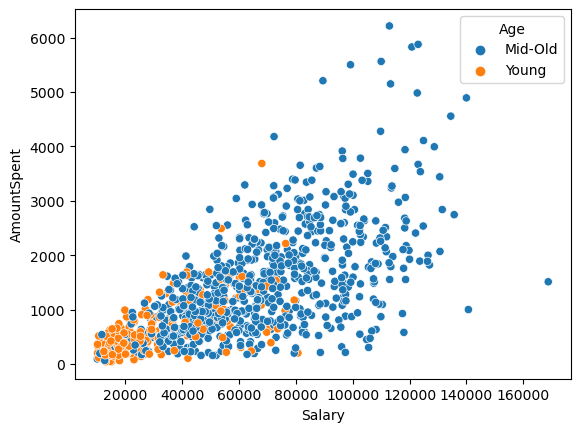

In [13]:
sns.scatterplot(x="Salary", y="AmountSpent", hue="Age", sizes=(1, 8), data=mk)

<AxesSubplot:xlabel='Children', ylabel='AmountSpent'>

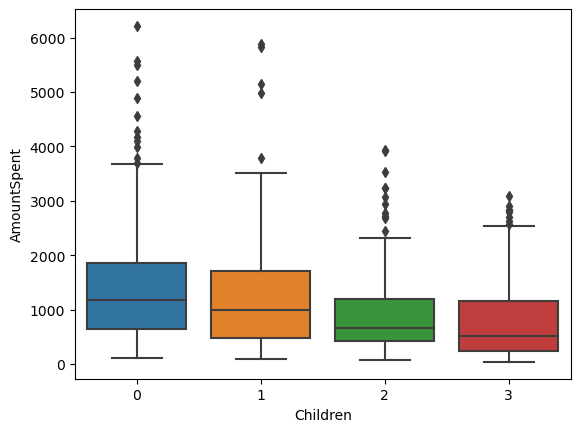

In [14]:
sns.boxplot(x=mk['Children'],y=mk['AmountSpent'])

In [15]:
# Combining 2 & 3 children category into 2-3.
# mk.Children[mk.Children == 2 | mk.Children == 3] = 'kids_2_3'


mk.Children[mk.Children == 3] = 'kids_2_3'
mk.Children[mk.Children == 2] = 'kids_2_3'
mk.Children[mk.Children == 1] = 'kids_1'
mk.Children[mk.Children == 0] = 'kids_0'

C:\Users\dheer\AppData\Local\Temp\ipykernel_3376\164036760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk.Children[mk.Children == 3] = 'kids_2_3'


<AxesSubplot:xlabel='Children', ylabel='AmountSpent'>

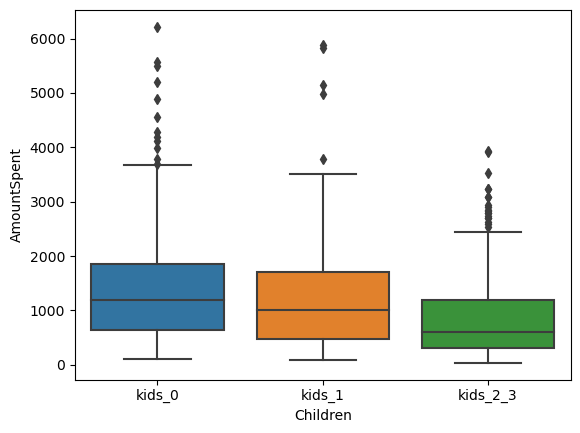

In [16]:
sns.boxplot(x=mk['Children'],y=mk['AmountSpent'])

<AxesSubplot:xlabel='History', ylabel='AmountSpent'>

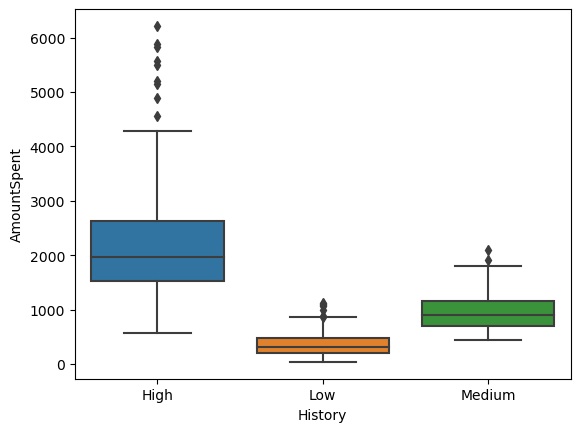

In [17]:
sns.boxplot(x=mk['History'],y=mk['AmountSpent']) 

In [18]:
mk.groupby(['History'])['AmountSpent'].sum()    # "History" column and calculates the total amount spent for each group.

History
High      557465
Low        82130
Medium    201485
Name: AmountSpent, dtype: int64

In [19]:
mk.groupby(['History'])['AmountSpent'].mean()   # "History" column and calculates the mean amount spent for each group.

History
High      2186.137255
Low        357.086957
Medium     950.400943
Name: AmountSpent, dtype: float64

In [20]:
index = pd.isna(mk.History)   # creating a index where History has NAs
print(index)          # printing the index to cross verify if we have captured correct data compared to print history.
print(mk.History)

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997    False
998    False
999    False
Name: History, Length: 1000, dtype: bool
0        High
1        High
2         Low
3        High
4        High
        ...  
995       NaN
996       NaN
997    Medium
998    Medium
999    Medium
Name: History, Length: 1000, dtype: object


In [21]:
mk.AmountSpent[index].mean()     # computing mean of amount spent for the respective row index where History is NA

1239.90099009901

In [23]:
mk.History[pd.isna(mk.History)] = 'Missing' 

C:\Users\dheer\AppData\Local\Temp\ipykernel_3376\3947137647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk.History[pd.isna(mk.History)] = 'Missing'


<AxesSubplot:xlabel='History', ylabel='AmountSpent'>

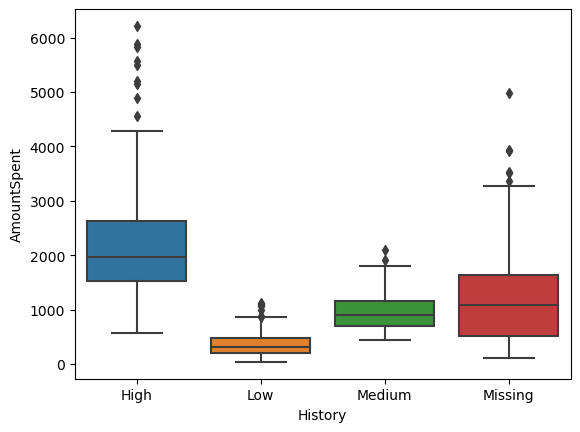

In [24]:
sns.boxplot(x=mk['History'],y=mk['AmountSpent'])

In [25]:
mk['Catalogs'].describe()

count    1000.000000
mean       14.682000
std         6.622895
min         6.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        24.000000
Name: Catalogs, dtype: float64

In [26]:
mk['Catalogs'].head(20)

0      6
1      6
2     18
3     18
4     12
5      6
6     12
7     18
8      6
9     18
10    12
11    18
12    24
13    12
14    24
15    12
16    24
17    18
18    18
19    12
Name: Catalogs, dtype: int64

<AxesSubplot:xlabel='Catalogs', ylabel='AmountSpent'>

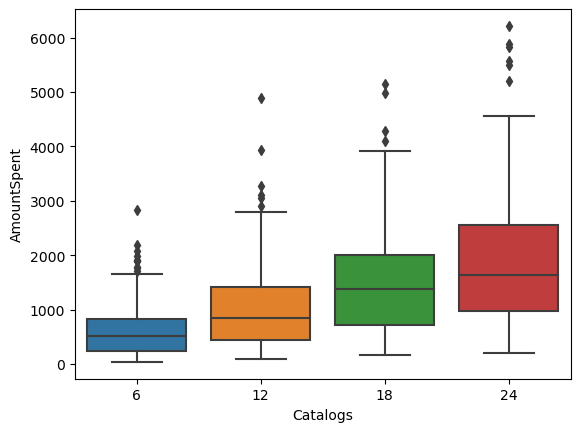

In [27]:
sns.boxplot(x=mk['Catalogs'],y=mk['AmountSpent'])

In [28]:
mk.info()        # data is ready to build our model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   object
 7   History      1000 non-null   object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


### Building the Model

In [29]:
mk.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent'],
      dtype='object')

In [30]:
X = mk[['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs']]
y = mk['AmountSpent']

In [31]:
# Split the data into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)   
# using this we'll run into error due to categorical data in independent variables. See next step

ValueError: could not convert string to float: 'Mid-Old'

#### Converting Categorical Features

Convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [34]:
Age = pd.get_dummies(mk['Age'],drop_first= True)
Gender = pd.get_dummies(mk['Gender'],drop_first= True)
OwnHome = pd.get_dummies(mk['OwnHome'],drop_first= True)
Married = pd.get_dummies(mk['Married'],drop_first= True)
Location = pd.get_dummies(mk['Location'],drop_first= True)
Children = pd.get_dummies(mk['Children'],drop_first= True)
History = pd.get_dummies(mk['History'],drop_first= True)

#Creates dummy variables for the "Age" column in the DataFrame "mk" and assigns the result to a new DataFrame or Series 
#called "Age," with the first category dropped as a reference category.

In [35]:
mk.drop(['Age','Gender','OwnHome','Married', 'Location','Children','History'],
        axis=1,inplace=True)

In [36]:
mk.head()

,Salary,Catalogs,AmountSpent
0,47500,6,755
1,63600,6,1318
2,13500,18,296
3,85600,18,2436
4,68400,12,1304


In [37]:
mk1 = pd.concat([mk,Age,Gender,OwnHome,Married,Location,Children,History],axis=1)

In [38]:
mk1

,Salary,Catalogs,AmountSpent,Young,Male,Rent,Single,Far,kids_1,kids_2_3,Low,Medium,Missing
0,47500,6,755,0,0,0,1,1,0,0,0,0,0
1,63600,6,1318,0,1,1,1,0,0,0,0,0,0
2,13500,18,296,1,0,1,1,0,0,0,1,0,0
3,85600,18,2436,0,1,0,0,0,1,0,0,0,0
4,68400,12,1304,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19400,18,384,1,0,1,1,0,1,0,0,0,1
996,40500,18,1073,0,1,1,1,1,1,0,0,0,1
997,44800,24,1417,0,1,0,1,0,0,0,0,1,0
998,79000,18,671,0,1,0,0,0,0,1,0,1,0


In [39]:
mk1.head()

,Salary,Catalogs,AmountSpent,Young,Male,Rent,Single,Far,kids_1,kids_2_3,Low,Medium,Missing
0,47500,6,755,0,0,0,1,1,0,0,0,0,0
1,63600,6,1318,0,1,1,1,0,0,0,0,0,0
2,13500,18,296,1,0,1,1,0,0,0,1,0,0
3,85600,18,2436,0,1,0,0,0,1,0,0,0,0
4,68400,12,1304,0,0,0,1,0,0,0,0,0,0


In [40]:
mk1.columns

Index(['Salary', 'Catalogs', 'AmountSpent', 'Young', 'Male', 'Rent', 'Single',
       'Far', 'kids_1', 'kids_2_3', 'Low', 'Medium', 'Missing'],
      dtype='object')

In [41]:
X = mk1[['Salary', 'Catalogs', 'Young', 'Male', 'Rent', 'Single',
       'Far', 'kids_1', 'kids_2_3', 'Low', 'Medium', 'Missing']]
y = mk1['AmountSpent']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
lm.fit(X_train,y_train)   # now the model works

LinearRegression()

In [45]:
print(lm.intercept_)

-306.4433253046029


In [46]:
print(lm.coef_)

[ 2.01325072e-02  4.25221342e+01 -2.85593092e+01 -4.92791293e+01
 -2.55773288e+01  4.75920487e+01  4.57258673e+02 -1.57252013e+02
 -4.20369667e+02 -3.39203269e+02 -3.98073657e+02 -7.12791840e+00]


In [47]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
Salary,0.020133
Catalogs,42.522134
Young,-28.559309
Male,-49.279129
Rent,-25.577329
Single,47.592049
Far,457.258673
kids_1,-157.252013
kids_2_3,-420.369667
Low,-339.203269


#### Stats Model Library

In [49]:
import statsmodels.formula.api as smf  

In [50]:
lm1 = smf.ols(formula='AmountSpent ~ Salary+Catalogs+Young+Male+Rent+Single+Far+kids_1+kids_2_3+Low+Medium+Missing', data=mk1).fit()

In [51]:
lm1.params

Intercept   -200.349081
Salary         0.018496
Catalogs      41.997412
Young        -21.042519
Male         -50.001304
Rent         -27.280538
Single        14.754563
Far          432.832961
kids_1      -146.060133
kids_2_3    -413.438077
Low         -373.029367
Medium      -404.513615
Missing      -11.641930
dtype: float64

In [52]:
lm1.pvalues  

Intercept    5.588746e-02
Salary       6.585873e-67
Catalogs     4.115137e-57
Young        6.501591e-01
Male         1.275623e-01
Rent         4.546404e-01
Single       7.329139e-01
Far          4.561010e-31
kids_1       2.116326e-04
kids_2_3     2.128869e-21
Low          1.595667e-08
Medium       8.706606e-14
Missing      8.206453e-01
dtype: float64

In [53]:
lm2 = smf.ols(formula='AmountSpent ~ Salary+Catalogs+Far+kids_1+kids_2_3+Low+Medium', data=mk1).fit()

In [54]:
lm2.params

Intercept   -253.740616
Salary         0.018612
Catalogs      42.080172
Far          434.219917
kids_1      -146.761679
kids_2_3    -414.338066
Low         -358.113691
Medium      -394.348064
dtype: float64

In [55]:
lm2.pvalues

Intercept     1.052836e-05
Salary       3.671175e-154
Catalogs      3.454354e-59
Far           6.563270e-33
kids_1        1.093078e-04
kids_2_3      2.522157e-24
Low           2.151186e-14
Medium        1.889927e-21
dtype: float64

In [56]:
X = mk1[['Salary', 'Catalogs', 'Far', 'kids_1', 'kids_2_3', 'Low', 'Medium']]
y = mk1['AmountSpent']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
lm.fit(X_train,y_train)

LinearRegression()

In [63]:
print(lm.intercept_)

-321.7565171934111


In [64]:
print(lm.coef_)

[ 1.99215792e-02  4.25963676e+01  4.56598918e+02 -1.60671846e+02
 -4.23087698e+02 -3.24103539e+02 -3.88199862e+02]


In [65]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
Salary,0.019922
Catalogs,42.596368
Far,456.598918
kids_1,-160.671846
kids_2_3,-423.087698
Low,-324.103539
Medium,-388.199862


### Prediction

In [66]:
predictions = lm.predict(X_test)

In [70]:
predictions

array([ 534.49319086, 1136.25689886, 1096.49169596, 2406.53643233,
       -301.93395547,  387.82372314, 2222.37771948,  105.04825236,
       2105.85581426,  156.94337578,  162.63359388, 2687.82545298,
       1119.84034952, 1577.35197326, -163.34407339,  -34.9847941 ,
       1935.5069789 ,  518.76589895, 2024.5911051 , 1597.72352853,
       2727.27385757, 1339.56796074, 2131.39840264, 1848.54497635,
        999.65092676, -262.16000598, 2501.11160198, 1901.82753242,
        507.1168823 , 2309.05592217, 2011.04075348, 2398.26960851,
       1250.30736019, 2405.84348637, 1624.25930523, 1709.22914986,
        184.15257718, 2511.82260999, 1162.73694383,  314.32385152,
        301.57894055, 1984.14694292,  787.97815068,  532.32198931,
       1679.66972369,  536.03537272, 1204.8431926 , 3296.58425886,
        237.82988708,  870.1359114 , 1158.11910228,  735.63305119,
       1473.78451189, 1400.07466883, 1807.61411815, 2091.08253489,
        658.24995185,  822.7378869 ,   31.33840929,  192.51596

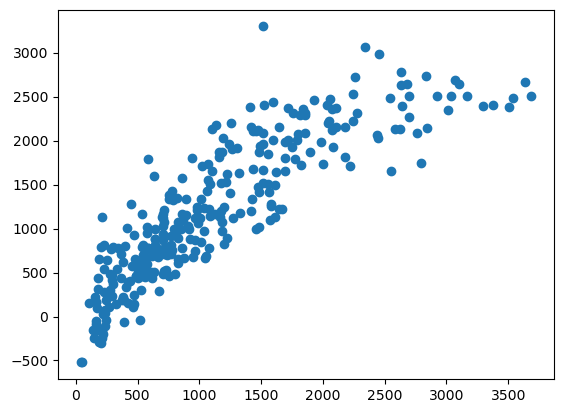

In [71]:
plt.scatter(y_test,predictions)

E:\Anaconds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AmountSpent', ylabel='Density'>

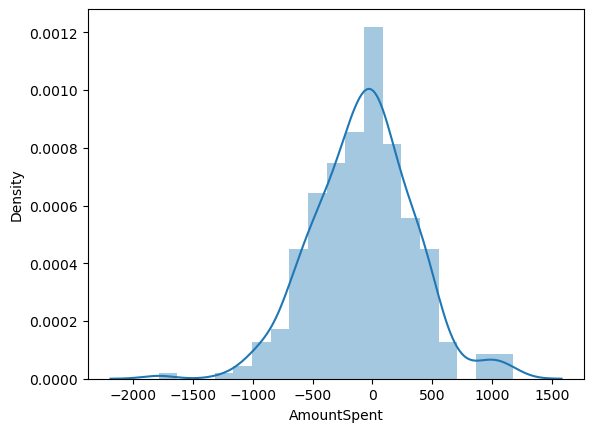

In [69]:
sns.distplot((y_test - predictions))

### Evaluation Metrics

In [72]:
from sklearn import metrics

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 326.36052303547154
MSE: 180905.6652869723


In [74]:
metrics.mean_absolute_error(y_test, predictions) * metrics.mean_absolute_error(y_test, predictions)

106511.19099598656

#### Checking Our R squared Score

In [75]:
from sklearn.metrics import r2_score

In [77]:
acc = (r2_score(y_test,predictions))

In [80]:
print("Accuracy of the model is",int(acc*100),"%")

Accuracy of the model is 72 %


Since I have got 72% accuracy, the model can be considered good 